# Analysis of Yelp Business Intelligence Data

In [1]:
%%info

# Installation and Initial Setup 

In [2]:
sc.list_packages()

VBox()

Starting Spark application


ID,YARN Application ID,Kind,State,Spark UI,Driver log,Current session?
1,application_1618973538330_0002,pyspark,idle,,,✔


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

SparkSession available as 'spark'.


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Package                    Version  
-------------------------- ---------
beautifulsoup4             4.9.1    
boto                       2.49.0   
click                      7.1.2    
jmespath                   0.10.0   
joblib                     0.16.0   
lxml                       4.5.2    
mysqlclient                1.4.2    
nltk                       3.5      
nose                       1.3.4    
numpy                      1.16.5   
pip                        9.0.1    
py-dateutil                2.2      
python37-sagemaker-pyspark 1.4.0    
pytz                       2020.1   
PyYAML                     5.3.1    
regex                      2020.7.14
setuptools                 28.8.0   
six                        1.13.0   
soupsieve                  1.9.5    
tqdm                       4.48.2   
wheel                      0.29.0   
windmill                   1.6

In [28]:
sc.install_pypi_package("pandas==1.0.3")
sc.install_pypi_package("matplotlib==3.2.1")
sc.install_pypi_package("seaborn")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

# Importing

In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

# Loading Data

In [2]:
df = spark.read.json('s3://sta9760-spark-s3-dataset/yelp/yelp_academic_dataset_business.json')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

# Overview of Data 

In [13]:
print('Columns:',len(df.columns),'|','Rows:',df.count())

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Columns: 14 | Rows: 160585

In [14]:
df.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- address: string (nullable = true)
 |-- attributes: struct (nullable = true)
 |    |-- AcceptsInsurance: string (nullable = true)
 |    |-- AgesAllowed: string (nullable = true)
 |    |-- Alcohol: string (nullable = true)
 |    |-- Ambience: string (nullable = true)
 |    |-- BYOB: string (nullable = true)
 |    |-- BYOBCorkage: string (nullable = true)
 |    |-- BestNights: string (nullable = true)
 |    |-- BikeParking: string (nullable = true)
 |    |-- BusinessAcceptsBitcoin: string (nullable = true)
 |    |-- BusinessAcceptsCreditCards: string (nullable = true)
 |    |-- BusinessParking: string (nullable = true)
 |    |-- ByAppointmentOnly: string (nullable = true)
 |    |-- Caters: string (nullable = true)
 |    |-- CoatCheck: string (nullable = true)
 |    |-- Corkage: string (nullable = true)
 |    |-- DietaryRestrictions: string (nullable = true)
 |    |-- DogsAllowed: string (nullable = true)
 |    |-- DriveThru: string (nullable = true)
 |    |-- GoodForDancing: str

In [15]:
df.select('business_id','name','city','state','stars','categories').show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+--------------------+-----------+-----+-----+--------------------+
|         business_id|                name|       city|state|stars|          categories|
+--------------------+--------------------+-----------+-----+-----+--------------------+
|6iYb2HFDywm3zjuRg...| Oskar Blues Taproom|    Boulder|   CO|  4.0|Gastropubs, Food,...|
|tCbdrRPZA0oiIYSmH...|Flying Elephants ...|   Portland|   OR|  4.0|Salad, Soup, Sand...|
|bvN78flM8NLprQ1a1...|      The Reclaimory|   Portland|   OR|  4.5|Antiques, Fashion...|
|oaepsyvc0J17qwi8c...|         Great Clips|Orange City|   FL|  3.0|Beauty & Spas, Ha...|
|PE9uqAjdw0E4-8mjG...|   Crossfit Terminus|    Atlanta|   GA|  4.0|Gyms, Active Life...|
+--------------------+--------------------+-----------+-----+-----+--------------------+
only showing top 5 rows

# Analyzing Categories

# Association Table

In [9]:
from pyspark.sql.functions import split, explode
df_new=df.withColumn('categories',explode(split('categories',',')))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [10]:
df_new.select('business_id','categories').show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+-------------+
|         business_id|   categories|
+--------------------+-------------+
|6iYb2HFDywm3zjuRg...|   Gastropubs|
|6iYb2HFDywm3zjuRg...|         Food|
|6iYb2HFDywm3zjuRg...| Beer Gardens|
|6iYb2HFDywm3zjuRg...|  Restaurants|
|6iYb2HFDywm3zjuRg...|         Bars|
+--------------------+-------------+
only showing top 5 rows

# Total Unique Categories 

In [12]:
import pyspark.sql.functions as F
df_new.select(F.countDistinct("categories")).show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------------+
|count(DISTINCT categories)|
+--------------------------+
|                      2487|
+--------------------------+

# Top Categories By Business

# Counts of Businesses / Category

In [13]:
barchart_df = df_new.groupBy("categories").agg(F.countDistinct("business_id").alias("distinct_count")).orderBy("distinct_count",ascending=False)
barchart_df.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+--------------+
|          categories|distinct_count|
+--------------------+--------------+
|         Restaurants|         36340|
|                Food|         22094|
|            Shopping|         20056|
|         Restaurants|         14423|
|       Home Services|         12001|
|       Beauty & Spas|         11633|
|    Health & Medical|         11390|
|           Nightlife|          9808|
|      Local Services|          9299|
|                Bars|          8914|
| Event Planning &...|          7617|
|                Food|          7375|
|         Active Life|          7039|
|          Automotive|          6785|
|            Shopping|          6149|
|        Coffee & Tea|          5735|
|          Sandwiches|          5697|
| American (Tradit...|          5235|
|             Fashion|          5231|
|       Beauty & Spas|          4941|
+--------------------+--------------+
only showing top 20 rows

In [14]:
result_pdf = barchart_df.limit(20).toPandas()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

# Bar Chart of Top Categories

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

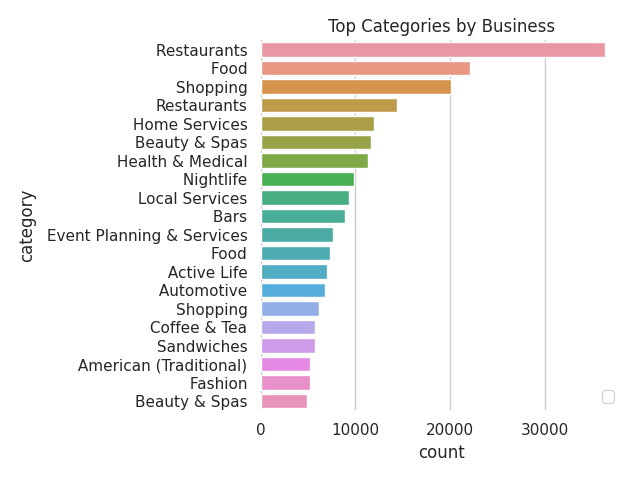

In [18]:
sns.set(style="whitegrid", color_codes=True)

sns.barplot(result_pdf['distinct_count'],result_pdf['categories'])
plt.title('Top Categories by Business')
plt.xlabel('count')
plt.ylabel('category')
plt.tight_layout()
plt.legend('')
plt.box(False)
%matplot plt

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

<string>:1: MatplotlibDeprecationWarning: Passing the block parameter of show() positionally is deprecated since Matplotlib 3.1; the parameter will become keyword-only in 3.3.

# Do Yelp Reviews Skew Negative? 

# Loading Review Data 

In [5]:
review_df = spark.read.json('s3://sta9760-spark-s3-dataset/yelp/yelp_academic_dataset_review.json')
review_df.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- business_id: string (nullable = true)
 |-- cool: long (nullable = true)
 |-- date: string (nullable = true)
 |-- funny: long (nullable = true)
 |-- review_id: string (nullable = true)
 |-- stars: double (nullable = true)
 |-- text: string (nullable = true)
 |-- useful: long (nullable = true)
 |-- user_id: string (nullable = true)

In [4]:
review_df.select('business_id','stars').show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+-----+
|         business_id|stars|
+--------------------+-----+
|buF9druCkbuXLX526...|  4.0|
|RA4V8pr014UyUbDvI...|  4.0|
|_sS2LBIGNT5NQb6PD...|  5.0|
|0AzLzHfOJgL7ROwhd...|  2.0|
|8zehGz9jnxPqXtOc7...|  4.0|
+--------------------+-----+
only showing top 5 rows

# calculating Average Star Rating per Business

In [7]:
review_avg_df=review_df.groupBy("business_id").agg({'stars':'avg'})
review_avg_df.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+-----------------+
|         business_id|       avg(stars)|
+--------------------+-----------------+
|yHtuNAlYKtRZniO8O...|4.714285714285714|
|R0IJhEI-zSJpYT1YN...|3.606060606060606|
|uEUweopM30lHcVxjO...|              3.0|
|L3WCfeVozu5etMhz4...|              4.2|
|XzXcpPCb8Y5huklEN...|4.666666666666667|
+--------------------+-----------------+
only showing top 5 rows

In [12]:
bus_rvw_join = df.join(review_avg_df, df.business_id == review_avg_df.business_id,how='left').select('avg(stars)','stars','name','city','state')
bus_rvw_join.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+------------------+-----+--------------------+---------------+-----+
|        avg(stars)|stars|                name|           city|state|
+------------------+-----+--------------------+---------------+-----+
|               5.0|  5.0|    CheraBella Salon|        Peabody|   MA|
|             3.875|  4.0|Mezcal Cantina & ...|       Columbus|   OH|
|3.8666666666666667|  4.0|    Red Table Coffee|         Austin|   TX|
|               5.0|  5.0|          WonderWell|         Austin|   TX|
|             3.375|  3.5|         Avalon Oaks|     Wilmington|   MA|
|               1.8|  2.0|Allstate Insuranc...|         Austin|   TX|
|               4.2|  4.0|Divine Frozen Yogurt|   Happy Valley|   OR|
|2.5454545454545454|  2.5|Glendale Square M...|        Everett|   MA|
| 3.774193548387097|  4.0| ONE Boulder Fitness|        Boulder|   CO|
|               5.0|  5.0|    Mel's Frame Shop|       Portland|   OR|
| 2.857142857142857|  3.0|              Subway|        Orlando|   FL|
|1.8392857142857142|

# Review Data Skew Analaysis

In [20]:
from pyspark.sql.functions import udf
from pyspark.sql.types import *
def skew_calc(val1, val2):
    return ((val2 - val1)/val1)

udf_skew = udf(skew_calc,FloatType())

skew_df=bus_rvw_join.withColumn('skew', udf_skew(bus_rvw_join["stars"], bus_rvw_join["avg(stars)"]))
skew_df.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+------------------+-----+--------------------+----------+-----+------------+
|        avg(stars)|stars|                name|      city|state|        skew|
+------------------+-----+--------------------+----------+-----+------------+
|               5.0|  5.0|    CheraBella Salon|   Peabody|   MA|         0.0|
|             3.875|  4.0|Mezcal Cantina & ...|  Columbus|   OH|    -0.03125|
|3.8666666666666667|  4.0|    Red Table Coffee|    Austin|   TX|-0.033333335|
|               5.0|  5.0|          WonderWell|    Austin|   TX|         0.0|
|             3.375|  3.5|         Avalon Oaks|Wilmington|   MA|-0.035714287|
+------------------+-----+--------------------+----------+-----+------------+
only showing top 5 rows

In [22]:
skew_df.select('skew').describe().show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------+--------------------+
|summary|                skew|
+-------+--------------------+
|  count|              160585|
|   mean|0.001144303735425...|
| stddev| 0.05142372026270017|
|    min|         -0.37142858|
|    max|           0.8888889|
+-------+--------------------+

In [27]:
skewdfPandas = skew_df.select('skew').toPandas()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

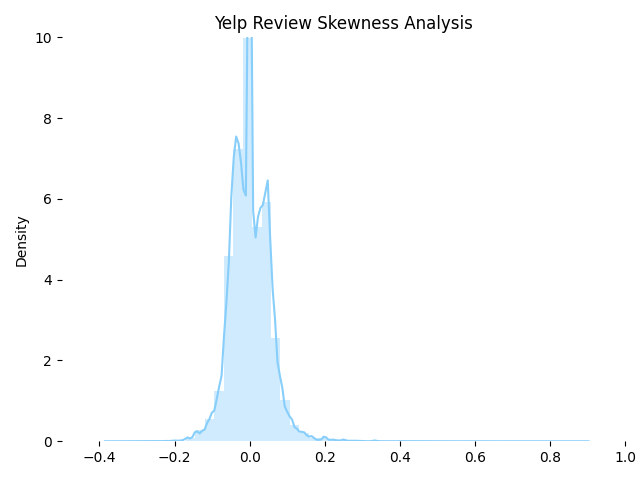

In [28]:
plt.clf()
plt.figure()
ax = sns.distplot(skewdfPandas,color="lightskyblue")
sns.set_style("white")
ax.set_title('Yelp Review Skewness Analysis')
plt.tight_layout()
plt.box(False)
plt.xlim(-0.5, 1)
plt.ylim(0, 10)
%matplot plt

# Skew Analysis
So, do Yelp (written) Reviews skew negative? Does this analysis actually prove anything?
Expound on implications / interpretations of this graph.

Answer: Most of the pints distributed close to 0 and also We can observer a slightly negative skewness.So we can say,Yelp reviews are slightly negative. But, we also need to look at other variables to support the negative skewness, in order to support this we need to plot review amount vs review stars.

Let us see how stars and reviews variable co-related by printing co-relation marix

In [32]:
review_df.createOrReplaceTempView('yelp')
corr_review = spark.sql(

'''
SELECT stars, count(*) as reviews
FROM yelp
GROUP by stars
'''
)
corr_review.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----+-------+
|stars|reviews|
+-----+-------+
|  1.0|1262800|
|  5.0|3814532|
|  2.0| 711378|
|  4.0|1920037|
|  3.0| 926656|
+-----+-------+

In [33]:
corrMatrix = corr_review.toPandas().corr()

print(corrMatrix)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

            stars   reviews
stars    1.000000  0.796355
reviews  0.796355  1.000000

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

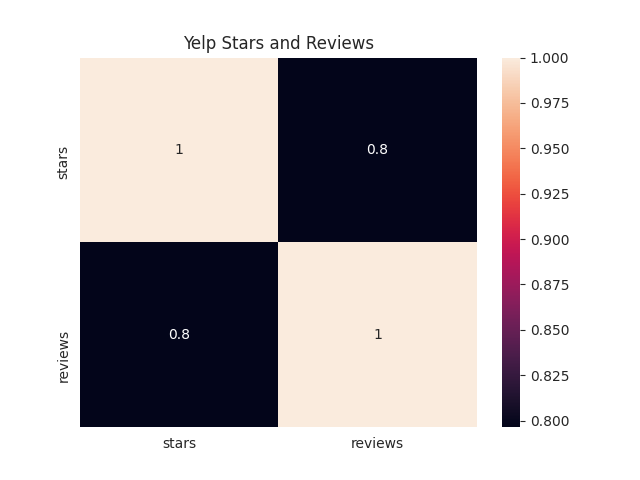

In [34]:
plt.figure()

sns.heatmap(corrMatrix, annot=True)
plt.title('Yelp Stars and Reviews')
%matplot plt

# Conclusion:
We see high correlation between number of reviews and number of stars.It means the negative skew on the basis of this data is not  entirely true statement.

In [8]:
user_df = spark.read.json('s3://sta9760-spark-s3-dataset/yelp/yelp_academic_dataset_user.json')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

# Elite User Rating Affect Analysis

# User Data Loading

In [6]:
user_df.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- average_stars: double (nullable = true)
 |-- compliment_cool: long (nullable = true)
 |-- compliment_cute: long (nullable = true)
 |-- compliment_funny: long (nullable = true)
 |-- compliment_hot: long (nullable = true)
 |-- compliment_list: long (nullable = true)
 |-- compliment_more: long (nullable = true)
 |-- compliment_note: long (nullable = true)
 |-- compliment_photos: long (nullable = true)
 |-- compliment_plain: long (nullable = true)
 |-- compliment_profile: long (nullable = true)
 |-- compliment_writer: long (nullable = true)
 |-- cool: long (nullable = true)
 |-- elite: string (nullable = true)
 |-- fans: long (nullable = true)
 |-- friends: string (nullable = true)
 |-- funny: long (nullable = true)
 |-- name: string (nullable = true)
 |-- review_count: long (nullable = true)
 |-- useful: long (nullable = true)
 |-- user_id: string (nullable = true)
 |-- yelping_since: string (nullable = true)

In [20]:
bus_rvw_ujoin = review_df.join(review_avg_df, review_df.business_id == review_avg_df.business_id,how='left')
bus_rvw_ujoin.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+----+-------------------+-----+--------------------+-----+--------------------+------+--------------------+--------------------+----------+
|         business_id|cool|               date|funny|           review_id|stars|                text|useful|             user_id|         business_id|avg(stars)|
+--------------------+----+-------------------+-----+--------------------+-----+--------------------+------+--------------------+--------------------+----------+
|--JuLhLvq3gyjNnXT...|   0|2014-11-02 02:09:04|    0|mNF2kv3FFF1Oqy2yZ...|  5.0|I am new to the a...|     1|4W3RuXRMCwkEu2rBX...|--JuLhLvq3gyjNnXT...|       5.0|
|--JuLhLvq3gyjNnXT...|   0|2012-10-24 17:32:51|    2|E-ue43e-4_H20BgSq...|  5.0|I was a regular c...|     2|5Cw4tptaueIOpo2Ng...|--JuLhLvq3gyjNnXT...|       5.0|
|--JuLhLvq3gyjNnXT...|   0|2013-03-11 18:38:22|    0|SKpMSlJy85cLhTxxU...|  5.0|Cherie is fantast...|     2|v0Q2hF7mQeBOLKSXh...|--JuLhLvq3gyjNnXT...|       5.0|
|--JuLhLvq3gyjNnXT...|   0|2

In [23]:
user_intrm_review_df=user_df.join(bus_rvw_ujoin, on="user_id", how="inner")

user_review_df=user_intrm_review_df.select('avg(stars)','stars', 'elite','review_count')
user_review_df.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----------------+-----+-----+------------+
|       avg(stars)|stars|elite|review_count|
+-----------------+-----+-----+------------+
|4.657407407407407|  5.0|     |          12|
|4.470588235294118|  5.0|     |          11|
|4.196113074204947|  5.0|     |          11|
|3.878260869565217|  1.0|     |          11|
|4.398058252427185|  2.0|     |          11|
+-----------------+-----+-----+------------+
only showing top 5 rows

In [26]:
import pyspark.sql.functions as F
review_skew = user_review_df.withColumn("skew", F.round((F.col('avg(stars)')-F.col('stars'))/F.col('stars'), 2))

review_skew.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----------------+-----+-----+------------+-----+
|       avg(stars)|stars|elite|review_count| skew|
+-----------------+-----+-----+------------+-----+
|4.657407407407407|  5.0|     |          12|-0.07|
|4.470588235294118|  5.0|     |          11|-0.11|
|4.089743589743589|  2.0|     |          11| 1.04|
|3.878260869565217|  1.0|     |          11| 2.88|
|4.398058252427185|  2.0|     |          11|  1.2|
+-----------------+-----+-----+------------+-----+
only showing top 5 rows

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

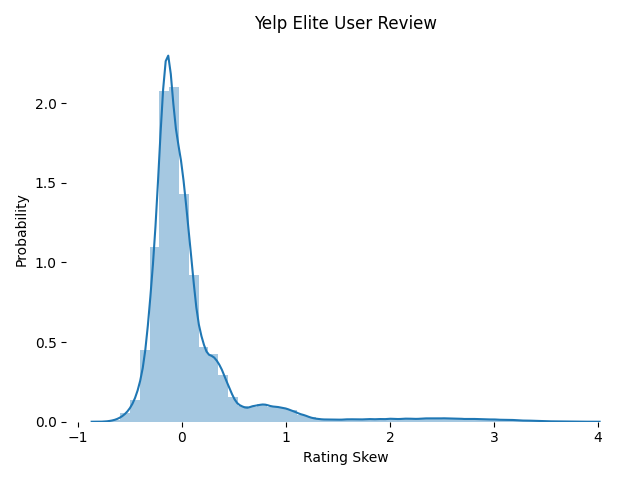

In [30]:
elite_review_skew=review_skew.filter(F.col('elite')!='')

result_pdf = elite_review_skew.toPandas()
plt.figure()
sns.distplot(result_pdf['skew'])
plt.title('Yelp Elite User Review')
plt.xlabel('Rating Skew')
plt.ylabel('Probability')
plt.tight_layout()
plt.box(False)
%matplot plt

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

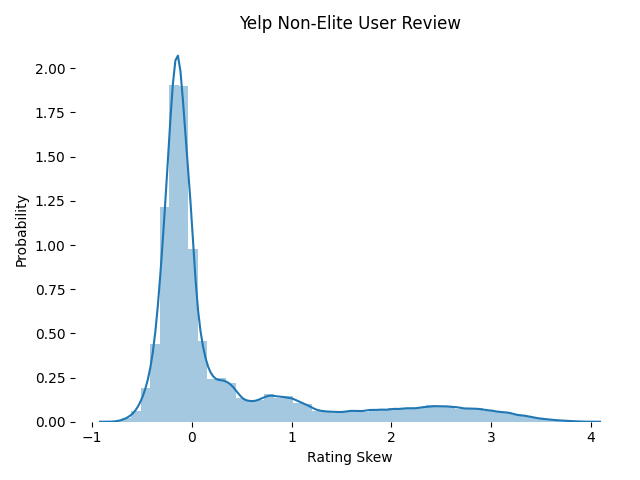

In [33]:
non_elite_review_skew=review_skew.filter(F.col('elite')=='')

result_pdf = non_elite_review_skew.toPandas()
plt.figure()
sns.distplot(result_pdf['skew'])
plt.title('Yelp Non-Elite User Review')
plt.xlabel('Rating Skew')
plt.ylabel('Probability')
plt.tight_layout()
plt.box(False)
%matplot plt

# Conclusion:- 
While looking at the skewness of the elite user and others it can be concluded that there is no significant effect of elite user on ratings.